In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%config IPCompleter.greedy = True

In [106]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [107]:
robust_scaler = RobustScaler()
    
df['Amount_scl'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scl'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(columns=['Amount', 'Time'],inplace = True)

In [108]:
X = df.drop('Class', axis=1)
y = df['Class']

In [109]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [110]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X,y)

In [111]:
y_under.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, stratify = y_under,random_state = 42)

In [113]:
y_train.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [114]:
y_test.value_counts()

0    99
1    98
Name: Class, dtype: int64

In [115]:
def plot_confusion_matrix(cm, labels, y_true, y_pred, acc_precision=4, cmap='Greens', title_color='Green'):
    fig = plt.figure(figsize=(6,3))
    ax = plt.axes()

    ax = sns.heatmap(data=cm, annot=True, xticklabels=labels, yticklabels=labels, cmap=cmap, cbar=False)

    plt.xlabel("Predicted Values",fontsize=12)
    plt.ylabel("True Values",fontsize=12) 
    plt.title("Confusion Matrix",fontsize=15,color=title_color,fontweight='bold')
    plt.suptitle("accuracy: " + str(round(accuracy_score(y_test, y_test_pred),4)) +"%",y=-0.09)
    plt.show()

In [116]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [117]:
y_test_pred = lr_clf.predict(X_test)

In [118]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



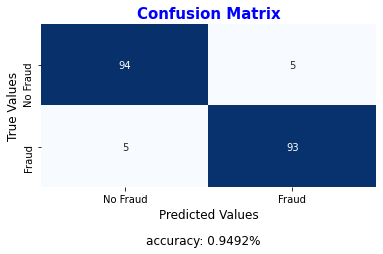

In [119]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, labels=['No Fraud', 'Fraud'], y_true=y_test, y_pred=y_test_pred, cmap='Blues', title_color='Blue')

In [120]:
svc_clf = SVC(kernel='rbf', C=0.1, random_state=42)
svc_clf.fit(X_train,y_train)

SVC(C=0.1, random_state=42)

In [121]:
y_test_pred = svc_clf.predict(X_test)

In [122]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.87      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



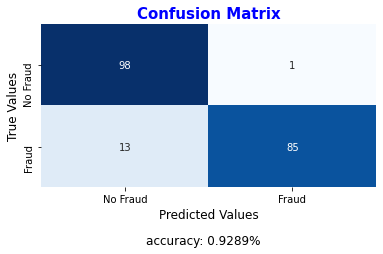

In [123]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, labels=['No Fraud', 'Fraud'], y_true=y_test, y_pred=y_test_pred, cmap='Blues', title_color='Blue')

In [124]:
rdmf_clf = RandomForestClassifier(n_estimators=200, max_depth=3, n_jobs=-1, random_state=42)
rdmf_clf.fit(X_under,y_under)

RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [125]:
y_test_pred = rdmf_clf.predict(X_test)

In [126]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



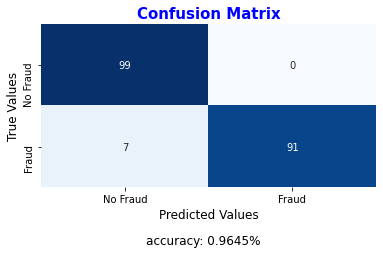

In [127]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, labels=['No Fraud', 'Fraud'], y_true=y_test, y_pred=y_test_pred, cmap='Blues', title_color='Blue')

In [128]:
param_grid = {'n_estimators': [2,8,64,100,200,250,500,700,1024],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'n_jobs': [-1],
             'random_state':[42]}

estimator = RandomForestClassifier()
gscv_cls = GridSearchCV(estimator, param_grid, n_jobs=-1)
gscv_cls.fit(X_under, y_under)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 8, 64, 100, 200, 250, 500, 700,
                                          1024],
                         'n_jobs': [-1], 'random_state': [42]})

In [129]:
best_clf = gscv_cls.best_estimator_
best_clf

RandomForestClassifier(max_depth=10, n_estimators=250, n_jobs=-1,
                       random_state=42)

In [130]:
y_test_pred = best_clf.predict(X_test)

In [131]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      0.99        98

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197



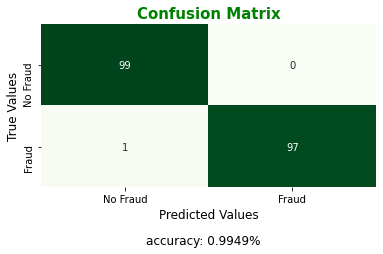

In [133]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, labels=['No Fraud', 'Fraud'], y_true=y_test, y_pred=y_test_pred)